In [36]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sbs

In [4]:
api4='http://chainradar.com/api/v1/mro/blocks/range/1542700/1542706/full'
payload={'type':'GET'}

In [5]:
response3=requests.get(api4,params=payload)
lista_json=response3.json()

The json object returned from the API call is a list of json trees each having three headers: 'cc','blockHeader' and 'transactions'. There are six elements in the list because we pass the header id of six blocks (see the API url above): 1542700 to 1542706.

An example of the meta data of viewable at the block level... remember, our call returned six such blocks.

In [7]:
lista_json[6]['blockHeader']

{'alreadyGeneratedCoins': 1.5888229638262e+19,
 'baseReward': 4879988318320,
 'blockSize': 266886,
 'cumulativeTxCount': 4159983,
 'difficulty': 129979810854,
 'feeSumm': 0,
 'fullRewardMaxBlockSize': 300000,
 'hash': '47b2b748c96ddf525eb405ce1b4a4d779ad0cee80ea933101f71aee68762c16d',
 'height': 1542706,
 'orphan': False,
 'penalty': 0,
 'prevBlockHash': 'dbedf10e8376ea74b236f5eaa9bad833e47a34b69b61a018e604f2a0e9401bcb',
 'reward': 4931133338320,
 'rewardBlocksWindow': 100,
 'sizeMedian': 39784,
 'timestamp': 1522610689,
 'txCount': 3,
 'txCumulativeSize': 266778}

Beneath the 'transactions' is a list of json objects: each with their own json document. These contain the following keys:

In [6]:
lista_json[6]['transactions'][2].keys()

dict_keys(['hash', 'size', 'fee', 'mixin', 'unlockTime', 'timestamp', 'removed', 'reason', 'blockHash', 'blockHeight', 'inputsCount', 'totalInputsAmount', 'outputsCount', 'totalOutputsAmount'])

#Plotting and time series using their convention of timestamp:


In [12]:
df=pd.DataFrame([i['blockHeader'] for i in lista_json])
#df=pd.DataFrame.from_dict([i['blockHeader'] for i in lista_json],orient='records')

In [20]:
df.head()
df.shape
df.dtypes

#convert the timestamp columns to datetime from int64
df['timestamp']=df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [27]:
df['timestamp']

0   2018-04-01 15:10:39
1   2018-04-01 15:10:55
2   2018-04-01 15:11:10
3   2018-04-01 15:11:17
4   2018-04-01 15:14:47
5   2018-04-01 15:24:35
6   2018-04-01 15:24:49
Name: timestamp, dtype: datetime64[ns]

Blocks are added to the blockchain quickly but with a good amount of variance! Below is the difference in timestamps in seconds.

In [26]:
arr=np.array(df['timestamp'])
g=arr[1:]-arr[:-1]
g/10**9

array([ 16,  15,   7, 210, 588,  14], dtype='timedelta64[ns]')

A time series chart of the number of block size of each block.

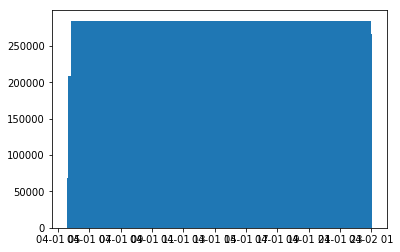

In [33]:
plt.bar(df['timestamp'],df['blockSize'])
plt.show()

In [39]:
df1=df.set_index(df['timestamp'])

/home/lechuza/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


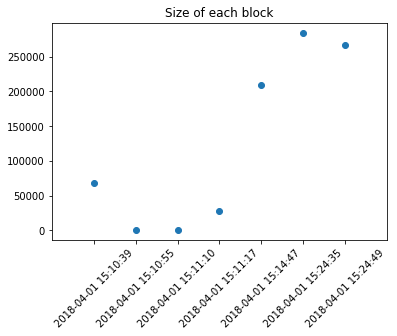

In [45]:
sbs.tsplot(df['blockSize'],interpolate=False)
plt.xticks(np.arange(7),df['timestamp'],rotation=45)
plt.title('Size of each block')
plt.show()

In order to accomplish some exploratory analysis, I'll retrieve many more blocks... I'll use the same range convention as above.

In [ ]:
api5='http://chainradar.com/api/v1/mro/blocks/range/1541700/1542706/full'
payload={'type':'GET'}
response3=requests.get(api5,params=payload)
lista_json=response3.json()